# <span style="color:#e74c3c; font-family:Arial, sans-serif;">Breast Cancer Awareness</span>

Breast cancer is the **most common cancer** amongst women in the world. It accounts for **25% of all cancer cases**, and affected over **2.1 million people** in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form **tumors** that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against its detection is how to classify tumors into **malignant** (cancerous) or **benign** (non-cancerous).


 # <span style="color:skyblue; font-family:Arial, sans-serif;">Importing Dependencies</span>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 # <span style="color:skyblue; font-family:Arial, sans-serif;">Reading the Data</span>

In [4]:
df=pd.read_csv("data.csv")
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)
pd.set_option('display.max_columns', None) #to view all columns of dataframe
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# <span style="color: skyblue; font-family: Arial, sans-serif;">Visualizing the Target Columns</span>


B    357
M    212
Name: diagnosis, dtype: int64


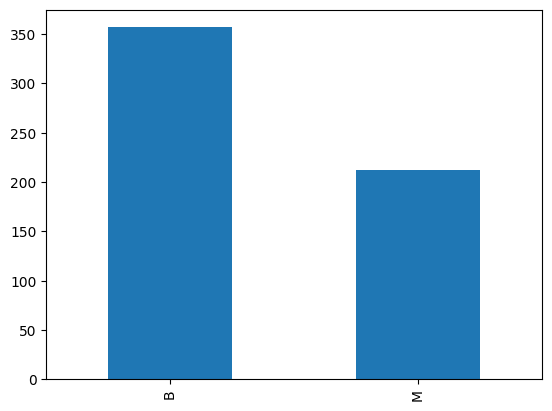

In [5]:
print(df['diagnosis'].value_counts())

df['diagnosis'].value_counts().plot(kind='bar')
plt.show()

# <span style="color: skyblue; font-family: Arial, sans-serif;">Converting the data into train, test and validation</span>


In [6]:
y=df["diagnosis"]
x=df.drop('diagnosis',axis=1)

In [7]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [8]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the dataset into main set (70%) and test set (30%) while preserving class distribution
x_main, x_test, y_main, y_test = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

# Split the main set into train set (50%) and validation set (50%) while preserving class distribution
x_train, x_validation, y_train, y_validation = train_test_split(x_main, y_main, test_size=0.3, random_state=42, stratify=y_main)

# Print the sizes of each set
print("Main Set:", x_main.shape, y_main.shape)
print("Test Set:", x_test.shape, y_test.shape)
print("Train Set:", x_train.shape, y_train.shape)
print("Validation Set:", x_validation.shape, y_validation.shape)


Main Set: (512, 30) (512,)
Test Set: (57, 30) (57,)
Train Set: (358, 30) (358,)
Validation Set: (154, 30) (154,)


In [10]:
# Create dataframes with both features and target
test_set = pd.concat([x_test, y_test], axis=1)
train_set = pd.concat([x_train, y_train], axis=1)
validation_set = pd.concat([x_validation, y_validation], axis=1)

# Save the dataframes as CSV files
test_set.to_csv("test.csv", index=False)
train_set.to_csv("train.csv", index=False)
validation_set.to_csv("validation.csv", index=False)

# <span style="color: skyblue; font-family: Arial, sans-serif;">Visualizing the Train Set</span>


In [11]:
train_df=pd.read_csv("train.csv")
train_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,10.940,18.59,70.39,370.0,0.10040,0.07460,0.04944,0.029320,0.1486,0.06615,0.3796,1.7430,3.018,25.78,0.009519,0.021340,0.01990,0.011550,0.02079,0.002701,12.40,25.58,82.76,472.4,0.13630,0.16440,0.14120,0.07887,0.2251,0.07732,B
1,12.620,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.022720,0.1799,0.05826,0.1692,0.6674,1.116,13.32,0.003888,0.008539,0.01256,0.006888,0.01608,0.001638,14.34,22.15,91.62,633.5,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330,B
2,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,0.3416,1.3120,2.275,20.98,0.010980,0.012570,0.01031,0.003934,0.02693,0.002979,11.15,24.62,71.11,380.2,0.13880,0.12550,0.06409,0.02500,0.3057,0.07875,B
3,13.750,23.77,88.54,590.0,0.08043,0.06807,0.04697,0.023440,0.1773,0.05429,0.4347,1.0570,2.829,39.93,0.004351,0.026670,0.03371,0.010070,0.02598,0.003087,15.01,26.34,98.00,706.0,0.09368,0.14420,0.13590,0.06106,0.2663,0.06321,B
4,12.040,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.023770,0.1854,0.05698,0.6061,2.6430,4.099,44.96,0.007517,0.015550,0.01465,0.011830,0.02047,0.003883,13.60,33.33,87.24,567.6,0.10410,0.09726,0.05524,0.05547,0.2404,0.06639,B


# <span style="color: skyblue; font-family: Arial, sans-serif;">Visualizing the Validation Set</span>


In [12]:
validation_df=pd.read_csv("validation.csv")
validation_df.head()


test_df=pd.read_csv("test.csv")

# <span style="color: skyblue; font-family: Arial, sans-serif;">Scaling the Features</span>


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

feature_columns = train_df.drop("diagnosis",axis=1).columns #target column hatxa

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the features and transform them
train_df[feature_columns] = scaler.fit_transform(train_df[feature_columns])


In [14]:
feature_columns = validation_df.drop("diagnosis",axis=1).columns #target column hatxa
validation_df[feature_columns] = scaler.transform(validation_df[feature_columns])


feature_columns = test_df.drop("diagnosis",axis=1).columns #target column hatxa
test_df[feature_columns] = scaler.transform(test_df[feature_columns])


In [15]:
train_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-0.901871,-0.173167,-0.886351,-0.820577,0.376973,-0.509738,-0.470517,-0.477802,-1.171469,0.487098,-0.054838,0.983732,0.152246,-0.357970,0.956561,-0.174964,-0.338731,-0.004732,0.104410,-0.372653,-0.787106,-0.043332,-0.716231,-0.709907,0.197384,-0.531412,-0.605386,-0.528366,-1.024948,-0.343878,B
1,-0.412041,-0.498523,-0.450821,-0.453889,-0.665522,-0.902875,-0.732436,-0.653855,-0.015027,-0.610207,-0.923762,-0.971565,-0.971093,-0.714121,-1.073880,-0.932266,-0.564200,-0.768714,-0.529189,-0.764741,-0.386232,-0.584675,-0.450976,-0.426123,-0.389657,-0.611328,-0.377587,-0.230415,0.593967,-0.559325,B
2,-1.272743,-0.283879,-1.283565,-1.070307,-0.860140,-0.903263,-0.929339,-1.106019,-0.454697,0.204775,-0.211773,0.200231,-0.286577,-0.495171,1.483373,-0.693794,-0.633315,-1.252799,0.930376,-0.270112,-1.045402,-0.194845,-1.065014,-0.872322,0.303732,-0.776194,-0.975187,-1.345606,0.255568,-0.267239,B
3,-0.082572,0.997211,-0.113636,-0.164179,-1.051896,-0.636201,-0.503224,-0.634649,-0.111089,-1.162337,0.172717,-0.263324,0.040621,0.046488,-0.906930,0.140356,0.085481,-0.247266,0.802580,-0.230277,-0.247785,0.076616,-0.259969,-0.298411,-1.615636,-0.658522,-0.630803,-0.798554,-0.370391,-1.100087,B
4,-0.581149,1.984576,-0.611324,-0.582185,-0.544601,-0.792487,-0.811753,-0.625847,0.188182,-0.788224,0.880576,2.619811,0.790695,0.190263,0.234675,-0.517498,-0.500000,0.041153,0.061363,0.063328,-0.539143,1.179821,-0.582107,-0.542208,-1.172378,-0.953896,-1.017630,-0.883358,-0.781872,-0.929659,B


In [16]:
validation_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.911738,0.425578,1.983550,2.013871,0.956534,1.229359,1.772082,1.730335,0.166014,-0.059468,0.815737,0.025716,0.853891,1.051486,-0.072181,0.213714,0.297740,0.526221,-1.189692,0.005788,1.580947,0.774208,1.692019,1.558257,0.627030,0.697530,1.201179,1.480677,-0.661129,0.335156,M
1,-0.575318,-1.494926,-0.611750,-0.586064,-0.144632,-0.939478,-0.864058,-0.736280,-0.787220,-0.497556,-0.870074,-0.860493,-0.938610,-0.716122,-0.482524,-0.858316,-0.693767,-0.869497,-0.721555,-0.435726,-0.634195,-1.174945,-0.676712,-0.603510,-0.176961,-0.790667,-0.868386,-0.659136,-0.607112,-0.254912,B
2,-0.333318,-0.826139,-0.303516,-0.383177,-1.212885,-0.099172,0.351257,-0.355631,-1.370984,-0.458615,-0.419505,0.340207,-0.244053,-0.429143,-0.161605,0.905881,1.484982,1.009650,-0.165979,-0.005647,-0.477152,-0.972928,-0.436007,-0.492885,-1.378267,-0.107921,0.321156,-0.182021,-1.425307,-0.668121,B
3,-0.592812,-0.837436,-0.607067,-0.601877,0.150157,-0.566869,-0.575523,-0.762955,1.019491,-0.412720,-0.684643,0.096613,-0.779145,-0.632944,-0.323507,-0.365458,-0.333509,-0.745935,-0.039528,-0.407325,-0.524678,-0.150653,-0.565940,-0.541680,0.256939,-0.305508,-0.195348,-0.567051,0.767139,-0.240978,B
4,0.363524,0.689930,0.328280,0.195647,-0.326371,0.082872,-0.413446,-0.389508,-0.281045,0.072653,-0.774261,-1.283874,-0.836434,-0.536617,-1.289508,-0.612153,-0.405082,-0.912760,-1.115705,-0.419128,0.328730,0.343342,0.213059,0.172098,-0.066359,0.510011,0.458315,0.135045,0.443038,0.749437,M


In [17]:
test_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-1.100136,-1.049821,-1.064736,-0.964985,0.263922,-0.180704,-0.651000,-0.716541,-0.628348,1.029493,-0.226641,2.376217,-0.216294,-0.542334,3.783890,1.325914,-0.147974,0.226331,2.251382,1.123773,-1.101194,-1.006071,-1.071600,-0.913013,0.184622,-0.536446,-0.939075,-1.106821,-0.734210,0.061292,B
1,0.611355,-0.333586,0.672276,0.483865,0.634555,1.064745,0.667732,0.807922,0.720220,0.348023,-0.243160,-0.938298,-0.340913,-0.093572,-0.966787,0.259267,-0.131694,-0.411632,-0.401393,0.038984,0.826724,0.221816,0.778896,0.679247,0.550459,2.086303,1.246739,1.102929,2.182696,2.120367,M
2,0.136103,-1.912918,0.130737,-0.012909,1.071015,0.173894,0.045641,0.281362,0.195572,0.190868,-0.412898,-0.626898,-0.491518,-0.403418,-1.099120,-0.682553,-0.064729,0.069012,-0.122932,-0.333186,-0.105206,-1.558463,-0.116264,-0.228830,-0.015312,-0.440799,-0.054832,0.127459,-0.011339,-0.197031,B
3,-0.251680,-0.256766,-0.295001,-0.321416,-1.464744,-0.793649,-0.481772,-0.494340,-1.289700,-0.995447,-0.787063,-0.939571,-0.900220,-0.612078,-0.323507,-0.554177,-0.469589,-0.510612,-1.221977,-0.752200,-0.270515,-0.310058,-0.346790,-0.330823,-0.147183,-0.329420,-0.382862,-0.139543,-1.050367,-0.776380,B
4,-0.097150,-0.387812,-0.146844,-0.220569,0.312577,-0.413488,-0.522954,-0.416983,-0.262572,-0.245830,-0.618565,-0.464744,-0.706500,-0.504889,-1.305734,-0.953149,-0.428427,-0.384429,-0.963695,-0.806790,-0.258117,-0.366875,-0.326432,-0.332761,-0.500258,-0.718931,-0.447126,-0.347836,-0.600757,-0.757622,B


In [18]:
print(train_df.shape)
print(validation_df.shape)

(358, 31)
(154, 31)


# <span style="color: skyblue; font-family: Arial, sans-serif;">Making ANN Architecture </span>


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [20]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()

model.add(Dense(units=16, activation='relu', input_dim=30))
model.add(Dropout(rate=0.2))

model.add(Dense(units=10, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 677
Trainable params: 677
Non-trainable params: 0
_________________________________________________________________


In [21]:

from tensorflow.keras.optimizers import RMSprop, SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2


checkpoint = ModelCheckpoint("bestmodel.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)


earlystop = EarlyStopping(monitor = 'val_loss', #value being monitored for improvement
                          min_delta = 0.0001,  #Abs value and is the main change required before we stop
                          patience = 10, #no of epocs we wait before stopping
                          verbose = 1,
                          restore_best_weights = True) #keep the best weigts once stopped

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 10,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint,reduce_lr]

# We use a very small learning rate
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])


In [22]:
nb_train_samples=train_df.shape[0]
nb_validation_samples=validation_df.shape[0]
batch_size=10

# <span style="color: skyblue; font-family: Arial, sans-serif;">Encoding the Target Labels </span>


In [23]:
X_train_=train_df.drop("diagnosis",axis=1) # train features
y_train_=train_df['diagnosis'] # traiin output

X_validation=validation_df.drop("diagnosis",axis=1)
y_validation=validation_df['diagnosis']


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_)
y_validation_encoded = label_encoder.transform(y_validation)

In [24]:
y_train_

0      B
1      B
2      B
3      B
4      B
      ..
353    B
354    B
355    B
356    B
357    B
Name: diagnosis, Length: 358, dtype: object

In [25]:
y_train_encoded

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

# <span style="color: skyblue; font-family: Arial, sans-serif;">feeding the Features into the model</span>


In [26]:
history = model.fit(
    X_train_,y_train_encoded,
    batch_size=100,
    epochs=500,
    callbacks = callbacks,
    validation_data=(X_validation, y_validation_encoded)  # Provide your validation data here
)

Epoch 1/500
1/4 [======>.......................] - ETA: 17s - loss: 0.6125 - accuracy: 0.4800
Epoch 1: val_loss improved from inf to 0.58169, saving model to bestmodel.h5
4/4 [==============================] - 6s 85ms/step - loss: 0.6734 - accuracy: 0.3911 - val_loss: 0.5817 - val_accuracy: 0.3701 - lr: 0.0010
Epoch 2/500
1/4 [======>.......................] - ETA: 0s - loss: 0.6479 - accuracy: 0.4500
Epoch 2: val_loss improved from 0.58169 to 0.56343, saving model to bestmodel.h5
4/4 [==============================] - 0s 22ms/step - loss: 0.6498 - accuracy: 0.4218 - val_loss: 0.5634 - val_accuracy: 0.3896 - lr: 0.0010
Epoch 3/500
1/4 [======>.......................] - ETA: 0s - loss: 0.5962 - accuracy: 0.5000
Epoch 3: val_loss improved from 0.56343 to 0.54805, saving model to bestmodel.h5
4/4 [==============================] - 0s 21ms/step - loss: 0.6178 - accuracy: 0.4525 - val_loss: 0.5480 - val_accuracy: 0.4610 - lr: 0.0010
Epoch 4/500
1/4 [======>.......................] - ETA: 0s

# <span style="color: skyblue; font-family: Arial, sans-serif;">Visualizing the Training and Test Loss at different Epoches </span>


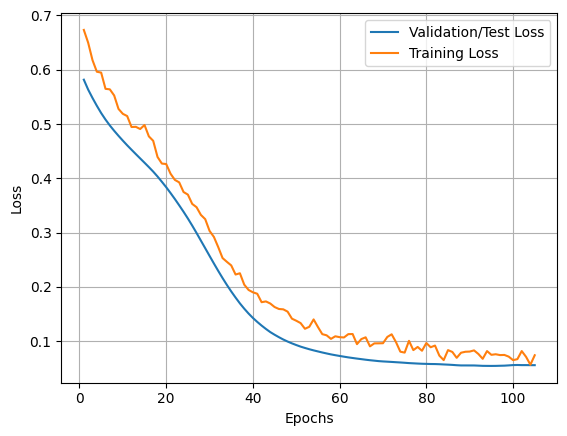

In [27]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# <span style="color: skyblue; font-family: Arial, sans-serif;">Visualizing the Training and Test Accuracy at different Epoches </span>


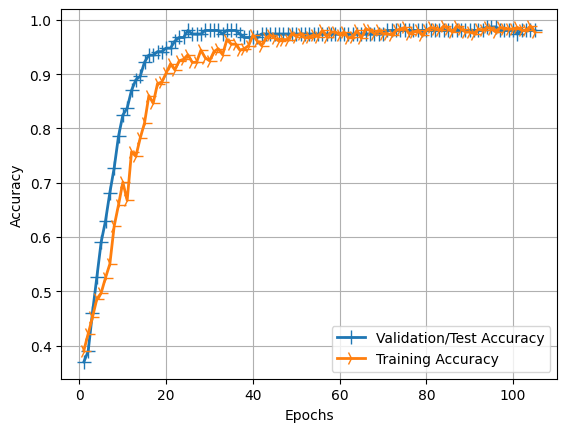

In [28]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# <span style="color: skyblue; font-family: Arial, sans-serif;">Model Evaluation </span>



5/5 [==============================] - 0s 2ms/step


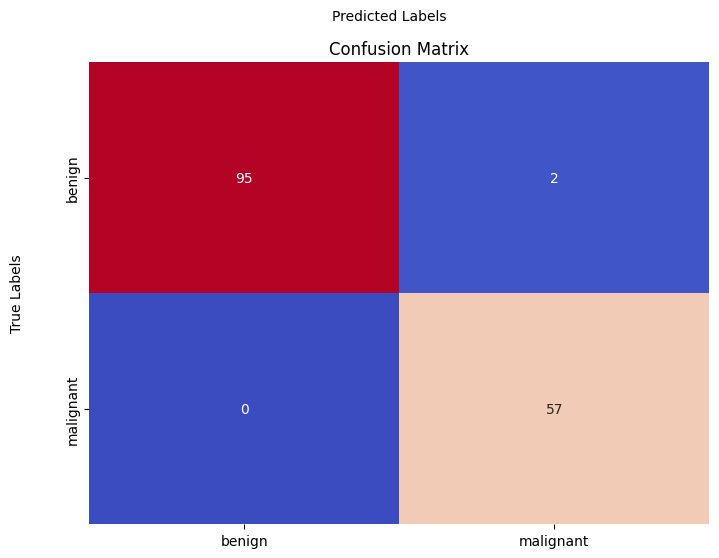

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model


class_names = ["benign", "malignant"]
# Make predictions using the model

model_=load_model('bestmodel.h5')
y_pred = model_.predict(X_validation)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate confusion matrix
cm = confusion_matrix(y_validation_encoded, y_pred_binary)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', cbar=False,
            xticklabels=class_names, yticklabels=class_names)


plt.figtext(0.5, 0.95, 'Predicted Labels', ha='center') # fisrt two parameter change horizontal and vertical placement

plt.ylabel('True Labels',labelpad=30)

plt.title('Confusion Matrix')
plt.show()


In [30]:
report=classification_report(y_validation_encoded ,y_pred_binary)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        97
           1       0.97      1.00      0.98        57

    accuracy                           0.99       154
   macro avg       0.98      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154



# <span style="color: skyblue; font-family: Arial, sans-serif;">Testing our model on Test Set </span>


In [31]:
test_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-1.100136,-1.049821,-1.064736,-0.964985,0.263922,-0.180704,-0.651000,-0.716541,-0.628348,1.029493,-0.226641,2.376217,-0.216294,-0.542334,3.783890,1.325914,-0.147974,0.226331,2.251382,1.123773,-1.101194,-1.006071,-1.071600,-0.913013,0.184622,-0.536446,-0.939075,-1.106821,-0.734210,0.061292,B
1,0.611355,-0.333586,0.672276,0.483865,0.634555,1.064745,0.667732,0.807922,0.720220,0.348023,-0.243160,-0.938298,-0.340913,-0.093572,-0.966787,0.259267,-0.131694,-0.411632,-0.401393,0.038984,0.826724,0.221816,0.778896,0.679247,0.550459,2.086303,1.246739,1.102929,2.182696,2.120367,M
2,0.136103,-1.912918,0.130737,-0.012909,1.071015,0.173894,0.045641,0.281362,0.195572,0.190868,-0.412898,-0.626898,-0.491518,-0.403418,-1.099120,-0.682553,-0.064729,0.069012,-0.122932,-0.333186,-0.105206,-1.558463,-0.116264,-0.228830,-0.015312,-0.440799,-0.054832,0.127459,-0.011339,-0.197031,B
3,-0.251680,-0.256766,-0.295001,-0.321416,-1.464744,-0.793649,-0.481772,-0.494340,-1.289700,-0.995447,-0.787063,-0.939571,-0.900220,-0.612078,-0.323507,-0.554177,-0.469589,-0.510612,-1.221977,-0.752200,-0.270515,-0.310058,-0.346790,-0.330823,-0.147183,-0.329420,-0.382862,-0.139543,-1.050367,-0.776380,B
4,-0.097150,-0.387812,-0.146844,-0.220569,0.312577,-0.413488,-0.522954,-0.416983,-0.262572,-0.245830,-0.618565,-0.464744,-0.706500,-0.504889,-1.305734,-0.953149,-0.428427,-0.384429,-0.963695,-0.806790,-0.258117,-0.366875,-0.326432,-0.332761,-0.500258,-0.718931,-0.447126,-0.347836,-0.600757,-0.757622,B
5,0.112777,0.093444,0.139252,-0.007538,0.170906,0.255232,0.117940,0.297634,0.280550,0.174178,-0.426939,1.180061,-0.226925,-0.327385,0.410639,0.275240,0.070122,0.436090,-0.725591,0.273204,0.024975,0.789990,0.084324,-0.086321,0.486651,0.338223,0.249220,0.649328,-0.283011,0.524878,M
6,-0.053415,0.055034,-0.107676,-0.156421,-0.593256,-0.728578,-0.947480,-0.648253,-0.916535,-0.822993,-0.210534,0.865570,-0.253503,-0.247923,-0.371465,-0.789632,-0.771483,-0.743969,0.016971,-0.510972,-0.119671,0.340186,-0.173147,-0.222488,-0.844826,-0.847929,-1.054605,-0.831323,-0.608701,-0.783883,B
7,-1.500164,-1.065637,-1.380208,-1.196514,0.193087,1.010520,0.014391,-0.493806,0.365528,3.776235,0.550600,-0.635623,0.240838,-0.367688,3.729802,4.104639,0.791989,0.996540,0.725902,6.719972,-1.338205,-1.607389,-1.320988,-1.041078,-0.466227,-0.033039,-0.594835,-0.998806,-1.020181,1.321819,B
8,-0.700691,2.244409,-0.695621,-0.686016,-0.111719,-0.293997,-0.177083,-0.721876,-0.015027,-0.137351,-0.327822,2.225334,-0.360403,-0.433716,1.079881,-0.006951,0.363169,-0.387378,0.637117,-0.584004,-0.638328,2.044708,-0.618033,-0.612318,0.380303,-0.287889,0.119254,-0.687960,-0.019282,-0.618278,B
9,1.494799,1.636626,1.489694,1.470850,0.491454,0.859462,1.418531,1.317943,0.365528,-0.062250,1.004472,-0.365125,0.921811,0.895991,0.189602,0.011389,0.275009,0.221415,-0.761912,-0.097859,1.552018,1.585434,1.590228,1.494842,1.979776,0.851069,1.476936,1.115065,0.574902,0.721568,M


In [32]:
# benign = 0
# malignant = 1

# y_pred = model_.predict(X_validation)
X_test_=test_df.drop("diagnosis",axis=1) # train features

test_row=X_test_.iloc[0,:] # testing from first row

test_row = np.expand_dims(test_row, axis=0)

y_pred_test = model_.predict([test_row])

y_pred_test = (y_pred_test > 0.5).astype(int)

if y_pred_test == 0:
   print("The cancer type is Benign")

elif y_pred_test == 1:
  print("The cancer type is Malignant")


1/1 [==============================] - 0s 81ms/step
The cancer type is Benign


# <span style="color: skyblue; font-family: Arial, sans-serif;">END </span>
